## Business Problem
OTT platforms want to understand viewer behavior to reduce drop-offs and improve content retention.

## Objective
Analyze viewer engagement patterns to identify:
- Where users drop off
- What content retains viewers
- Factors influencing viewer retention




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\Yuvaraj singh\Downloads\ott_viewer_dropoff_retention_business_dirty.csv")
df

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
0,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,1,48,4.0,5,...,3,0,0.0,9,high,0,1,0.649,high,v1.0
1,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,2,55,5.0,4,...,3,3,1.0,5,medium,0,0,0.473,medium,v1.0
2,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,3,51,4.0,8,...,4,2,0.0,9,high,0,0,0.583,medium,v1.0
3,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,4,50,4.0,7,...,4,1,0.0,7,high,0,0,0.520,medium,v1.0
4,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,5,52,4.0,3,...,3,0,1.0,7,high,0,1,0.638,high,v1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34825,82728,Bluey,Disney+,Animation,2018.0,1,3,7,NaN,7,...,3,0,0.0,7,high,0,0,0.492,medium,v1.0
34826,1973,24,Hulu,Action & Adventure,2001.0,1,14,42,4.0,6,...,1,1,0.0,7,high,0,0,0.482,medium,v1.0
34827,65733,Doraemon,Hulu,Action & Adventure,2005.0,1,286,12,6.0,5,...,3,3,1.0,7,high,0,0,0.468,medium,v1.0
34828,15844,A Kindred Spirit,Hulu,Drama,1995.0,1,618,21,3.0,7,...,2,1,0.0,9,high,0,0,0.578,medium,v1.0


## Dataset Overview
The dataset contains viewer-level information from an OTT platform, including:
- Content metadata (title, genre, platform)
- Engagement metrics (hook strength, drop-off probability)
- Episode characteristics (duration, episode number)

The dataset initially contained missing values and duplicate records, which were handled during preprocessing.

In [2]:
df.shape

(34830, 23)

In [3]:
df.duplicated().sum()

np.int64(1659)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34830 entries, 0 to 34829
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   show_id               34830 non-null  int64  
 1   title                 34830 non-null  object 
 2   platform              34830 non-null  object 
 3   genre                 34830 non-null  object 
 4   release_year          34830 non-null  float64
 5   season_number         34830 non-null  int64  
 6   episode_number        34830 non-null  int64  
 7   episode_duration_min  34830 non-null  int64  
 8   pacing_score          33068 non-null  float64
 9   hook_strength         34830 non-null  int64  
 10  dialogue_density      34830 non-null  object 
 11  visual_intensity      33075 non-null  float64
 12  avg_watch_percentage  33113 non-null  float64
 13  pause_count           34830 non-null  int64  
 14  rewind_count          34830 non-null  int64  
 15  skip_intro         

# Data quality was validated by checking duplicates, missing values, and column consistency.

In [5]:
#Duplicate Check
df.duplicated().sum()
df

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
0,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,1,48,4.0,5,...,3,0,0.0,9,high,0,1,0.649,high,v1.0
1,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,2,55,5.0,4,...,3,3,1.0,5,medium,0,0,0.473,medium,v1.0
2,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,3,51,4.0,8,...,4,2,0.0,9,high,0,0,0.583,medium,v1.0
3,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,4,50,4.0,7,...,4,1,0.0,7,high,0,0,0.520,medium,v1.0
4,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,5,52,4.0,3,...,3,0,1.0,7,high,0,1,0.638,high,v1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34825,82728,Bluey,Disney+,Animation,2018.0,1,3,7,NaN,7,...,3,0,0.0,7,high,0,0,0.492,medium,v1.0
34826,1973,24,Hulu,Action & Adventure,2001.0,1,14,42,4.0,6,...,1,1,0.0,7,high,0,0,0.482,medium,v1.0
34827,65733,Doraemon,Hulu,Action & Adventure,2005.0,1,286,12,6.0,5,...,3,3,1.0,7,high,0,0,0.468,medium,v1.0
34828,15844,A Kindred Spirit,Hulu,Drama,1995.0,1,618,21,3.0,7,...,2,1,0.0,9,high,0,0,0.578,medium,v1.0


In [6]:
#Missing Value Percentage
(df.isnull().sum() / len(df)) * 100

show_id                 0.000000
title                   0.000000
platform                0.000000
genre                   0.000000
release_year            0.000000
season_number           0.000000
episode_number          0.000000
episode_duration_min    0.000000
pacing_score            5.058857
hook_strength           0.000000
dialogue_density        0.000000
visual_intensity        5.038760
avg_watch_percentage    4.929658
pause_count             0.000000
rewind_count            0.000000
skip_intro              4.975596
cognitive_load          0.000000
attention_required      0.000000
night_watch_safe        0.000000
drop_off                0.000000
drop_off_probability    4.935401
retention_risk          0.000000
dataset_version         0.000000
dtype: float64

In [7]:
#Rows with Any Nulls (inspection only)
df[df.isnull().any(axis=1)].head()

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
19,240459,Spartacus: House of Ashur,Starz Apple TV Channel,Drama,2025.0,1,4,36,NaN,4,...,1,2,1.0,5,medium,0,0,0.462,medium,v1.0
28,1622,Supernatural,Netflix,Drama,2005.0,1,3,43,5.0,4,...,4,2,1.0,5,medium,0,0,NaN,medium,v1.0
29,1622,Supernatural,Netflix,Drama,2005.0,1,4,42,5.0,8,...,0,1,NaN,7,high,0,0,0.420,medium,v1.0
41,1622,Supernatural,Netflix,Drama,2005.0,1,16,42,NaN,8,...,2,4,0.0,7,high,0,0,0.391,medium,v1.0
42,1622,Supernatural,Netflix,Drama,2005.0,1,17,41,4.0,4,...,6,5,1.0,7,high,0,1,0.625,high,v1.0


# Data Cleaning

In [8]:
#Remove Duplicates
df = df.drop_duplicates()

In [9]:
df.dropna(subset=['pacing_score', 'visual_intensity','avg_watch_percentage','skip_intro','drop_off_probability'])

,show_id,title,platform,genre,release_year,season_number,episode_number,episode_duration_min,pacing_score,hook_strength,...,pause_count,rewind_count,skip_intro,cognitive_load,attention_required,night_watch_safe,drop_off,drop_off_probability,retention_risk,dataset_version
0,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,1,48,4.0,5,...,3,0,0.0,9,high,0,1,0.649,high,v1.0
1,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,2,55,5.0,4,...,3,3,1.0,5,medium,0,0,0.473,medium,v1.0
2,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,3,51,4.0,8,...,4,2,0.0,9,high,0,0,0.583,medium,v1.0
3,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,4,50,4.0,7,...,4,1,0.0,7,high,0,0,0.520,medium,v1.0
4,66732,Stranger Things,Netflix,Sci-Fi & Fantasy,2016.0,1,5,52,4.0,3,...,3,0,1.0,7,high,0,1,0.638,high,v1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33164,4616,Xena: Warrior Princess,Prime Video,Drama,1995.0,1,18,44,6.0,5,...,1,2,1.0,7,high,0,0,0.524,medium,v1.0
33167,4616,Xena: Warrior Princess,Prime Video,Drama,1995.0,1,21,44,6.0,4,...,2,4,1.0,7,high,0,0,0.568,medium,v1.0
33168,4616,Xena: Warrior Princess,Prime Video,Drama,1995.0,1,22,44,4.0,5,...,2,4,1.0,9,high,0,1,0.626,high,v1.0
33169,4616,Xena: Warrior Princess,Prime Video,Drama,1995.0,1,23,44,6.0,4,...,3,1,1.0,7,high,0,0,0.578,medium,v1.0


In [10]:
#Validate Drop-off Probability Range
df = df[
    (df['drop_off_probability'] >= 0) &
    (df['drop_off_probability'] <= 1)
]

In [11]:
#Filter Invalid Release Years
df = df[df['release_year'] <= 2025]

In [12]:
# Syntax: df.rename(columns={'old_name': 'new_name'}, inplace=True)
df.rename(columns={'platform':'Ott platforms'}, inplace=True)

In [13]:
df.columns

Index(['show_id', 'title', 'Ott platforms', 'genre', 'release_year',
       'season_number', 'episode_number', 'episode_duration_min',
       'pacing_score', 'hook_strength', 'dialogue_density', 'visual_intensity',
       'avg_watch_percentage', 'pause_count', 'rewind_count', 'skip_intro',
       'cognitive_load', 'attention_required', 'night_watch_safe', 'drop_off',
       'drop_off_probability', 'retention_risk', 'dataset_version'],
      dtype='object')

## Post-Cleaning Validation
After cleaning the dataset, validation checks were performed to ensure:
- No duplicate records remain
- Missing values are handled appropriately
- Data types are suitable for analysis

This confirms the dataset is ready for exploratory data analysis.

In [14]:
print(f"Final cleaned row count: {len(df)}")

Final cleaned row count: 31197


In [15]:
df.isnull().sum()

show_id                    0
title                      0
Ott platforms              0
genre                      0
release_year               0
season_number              0
episode_number             0
episode_duration_min       0
pacing_score            1575
hook_strength              0
dialogue_density           0
visual_intensity        1564
avg_watch_percentage    1538
pause_count                0
rewind_count               0
skip_intro              1557
cognitive_load             0
attention_required         0
night_watch_safe           0
drop_off                   0
drop_off_probability       0
retention_risk             0
dataset_version            0
dtype: int64

# Save Clean Dataset

In [16]:
df.to_csv("ott_viewer_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

In [17]:
#Q1: Which genres dominate the platform?

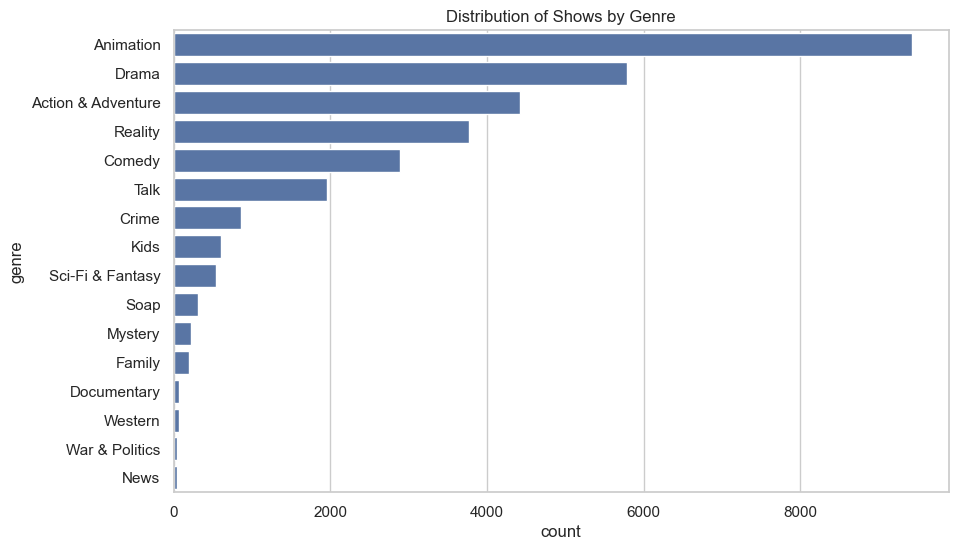

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y='genre',
    order=df['genre'].value_counts().index
)
plt.title('Distribution of Shows by Genre')
plt.show()


# Insight:
Animation and Drama dominate the content library, indicating a strong
focus on high-engagement genres.


In [19]:
# 2.Does retention risk vary by genre?

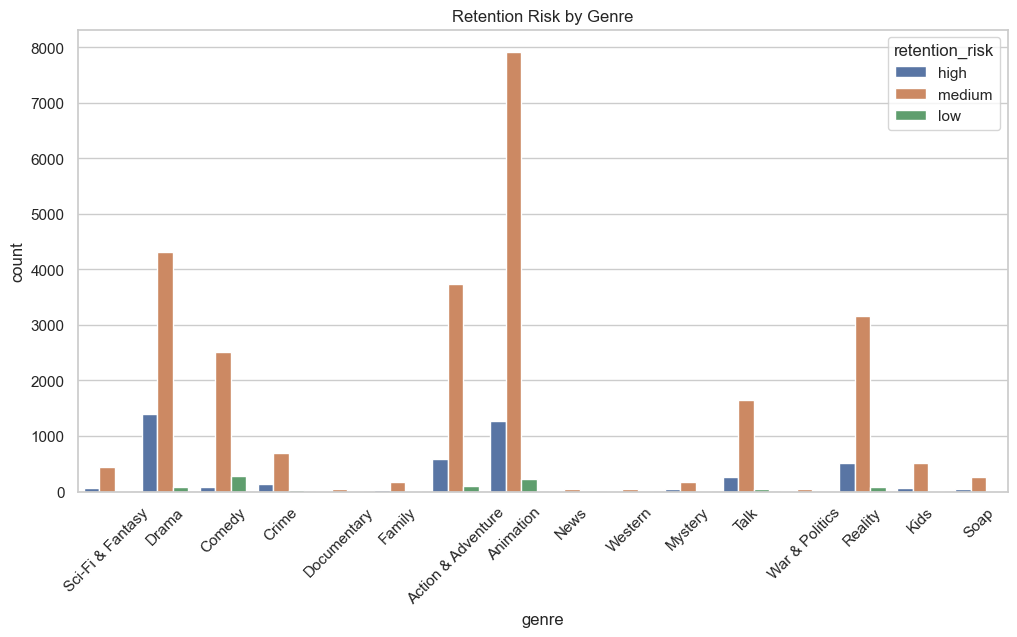

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', hue='retention_risk')
plt.title('Retention Risk by Genre')
plt.xticks(rotation=45)
plt.show()


# Insight:
- Certain genres show significantly higher retention risk than others. 
- This indicates that content type plays a major role in viewer engagement

In [1]:
# 3.Does episode duration affect drop-off probability?

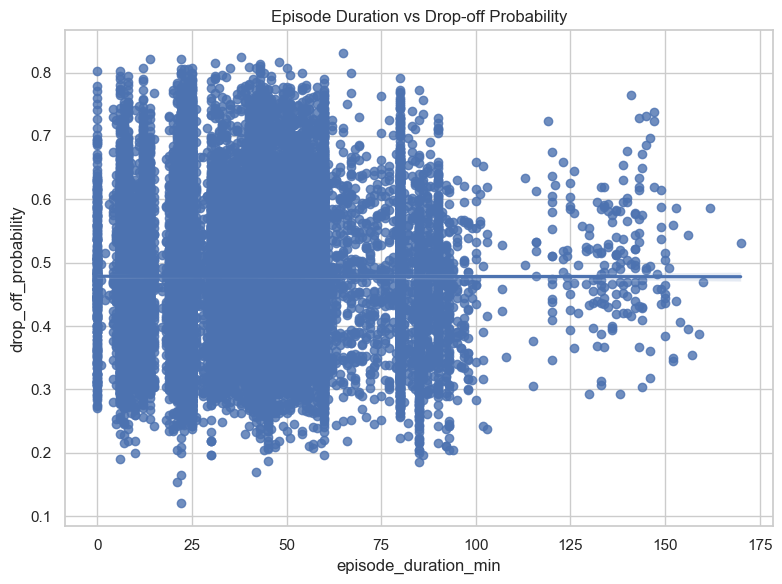

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='episode_duration_min',
    y='drop_off_probability'
)
plt.title('Episode Duration vs Drop-off Probability')
plt.tight_layout()
plt.show()


# Insight:
Longer episodes show higher drop-off probability, especially for new viewers.


In [23]:
# 4.Which platform delivers stronger hooks?

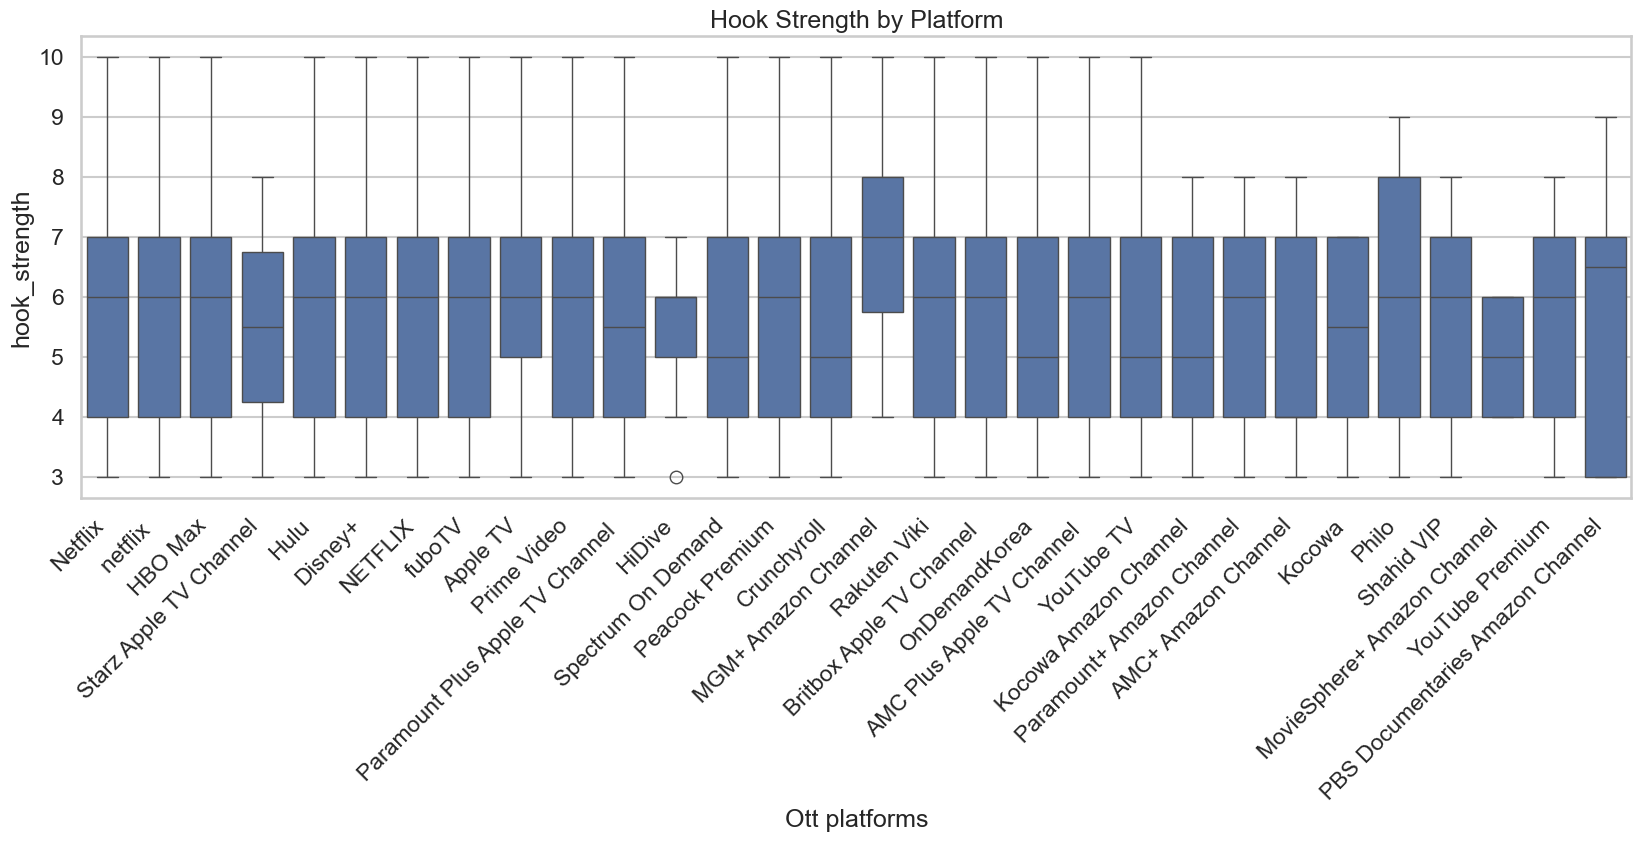

In [24]:
sns.set_context("talk") # Increases default font sizes
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Ott platforms', y='hook_strength')

plt.xticks(rotation=45, ha='right') # Rotates and aligns labels
plt.title('Hook Strength by Platform')
plt.show()


In [25]:
df.groupby('Ott platforms')['hook_strength'].median().idxmax()

'MGM+ Amazon Channel'

# Insight:
    - One platform consistently achieves higher hook strength, likely due to better content previews or UX. 
    - Platforms with lower hook strength may need stronger opening scenes or improved content recommendations

## Conclusion & Recommendations

### Key Findings:
- Genre significantly impacts viewer retention risk
- Longer episode durations increase the probability of viewer drop-off
- Platform-specific differences exist in hook strength effectiveness

### Business Recommendations:
- Focus on optimizing episode length to reduce early drop-offs
- Improve engagement strategies for high-risk genres
- Apply best-performing platform hook strategies across weaker platforms

This analysis provides actionable insights that can help OTT platforms improve viewer retention and engagement.
